<a href="https://colab.research.google.com/github/25stu0602-commits/opencv_guide/blob/main/opencv_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

프롬프트:open cv를 활용해서 인터넷에서 다운 받은 사진을 바탕 화면에 저장했고, 이 데이터를 입력 받아, 오픈 cv로 이미지 인식이 되는 걸 구글 코랩에서 실행을 하고 싶어. 코드를 만들어줘

Saving 1.jpg to 1 (1).jpg
업로드한 파일 이름: 1 (1).jpg


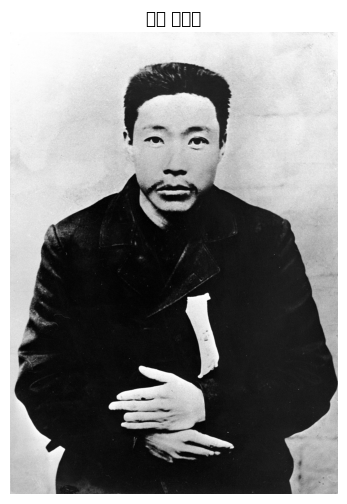

인식된 얼굴 개수: 1


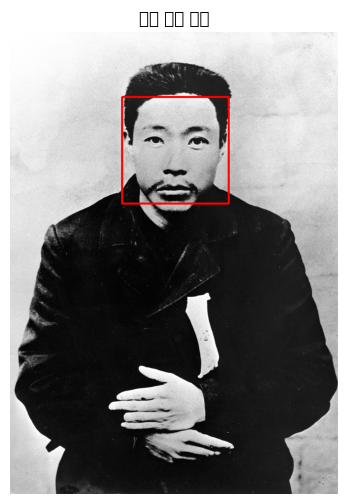

In [2]:
# ==========================
# 1️⃣ 기본 세팅
# ==========================
!pip install opencv-python opencv-contrib-python

import cv2
import matplotlib.pyplot as plt
from google.colab import files

# ==========================
# 2️⃣ 이미지 업로드 (바탕화면 이미지 업로드)
# ==========================
# Colab에서는 로컬 PC(바탕화면)에 있는 파일을 업로드해야 함.
# 실행 후 파일 선택창이 뜨면 바탕화면의 이미지를 선택하세요.

uploaded = files.upload()

# 업로드한 파일 이름 확인
for fn in uploaded.keys():
    print(f"업로드한 파일 이름: {fn}")
    filename = fn  # 이미지 파일 이름 저장

# ==========================
# 3️⃣ 이미지 불러오기 및 표시
# ==========================
img = cv2.imread(filename)

# OpenCV는 BGR 순서 → matplotlib은 RGB 순서이므로 변환 필요
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("원본 이미지")
plt.axis('off')
plt.show()

# ==========================
# 4️⃣ 얼굴 인식 실행
# ==========================
# Haar Cascade 분류기 로드 (OpenCV 기본 제공)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# 그레이스케일 변환 (인식 정확도 향상)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 검출 (scaleFactor와 minNeighbors는 조정 가능)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

print(f"인식된 얼굴 개수: {len(faces)}")

# 검출된 얼굴 영역 표시
for (x, y, w, h) in faces:
    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 3)

# ==========================
# 5️⃣ 결과 시각화
# ==========================
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("얼굴 인식 결과")
plt.axis('off')
plt.show()
